In [1]:
%run "C:\Users\11 PrO\Desktop\design proj\preprocessing_other models_old.ipynb"


Columns with missing values: []
Categorical features: ['proto', 'service', 'state']
Columns with missing values: []
                   Unnamed: 0        id       dur     proto   service  \
Unnamed: 0           1.000000  1.000000  0.017117 -0.003568  0.024453   
id                   1.000000  1.000000  0.017117 -0.003568  0.024453   
dur                  0.017117  0.017117  1.000000 -0.121704 -0.007036   
proto               -0.003568 -0.003568 -0.121704  1.000000  0.163221   
service              0.024453  0.024453 -0.007036  0.163221  1.000000   
state                0.375842  0.375842  0.083886 -0.152795 -0.104715   
spkts               -0.049826 -0.049826  0.264716  0.011486  0.105379   
dpkts               -0.092853 -0.092853  0.192954  0.021882  0.070046   
sbytes               0.001509  0.001509  0.211499  0.005056  0.098579   
dbytes              -0.059282 -0.059282  0.152250  0.012977  0.032849   
rate                 0.283977  0.283977 -0.117749  0.022988 -0.112416   
sttl    

### Batch size to resolve class imbalance

In [2]:
import pandas as pd

# Assuming act_df is your DataFrame with 'attack_cat' column representing class attack_cats

# Function to sample 50,000 rows from each group without replacement if the group size is sufficient
def sample_rows(group):
    sample_size = min(50000, len(group))
    return group.sample(n=sample_size, replace=sample_size < 50000, random_state=0)

# Apply the sampling function to each group (label)
sampled_df1 = actual_df2.groupby('attack_cat', group_keys=False).apply(sample_rows)

# Reset the index of the sampled DataFrame
sampled_df1.reset_index(drop=True, inplace=True)

# Display the sampled DataFrame
print(sampled_df1)


            id  sbytes  dbytes  dwin  ct_src_dport_ltm  ct_dst_src_ltm  \
0        73592      46       0     0                 1               1   
1        23754    4134   63516   255                 1               3   
2        76738     570     682   255                 2               1   
3         3238    1540    1644   255                 5              12   
4        44672     868    1332   255                 1               2   
...        ...     ...     ...   ...               ...             ...   
185119  153736     114       0     0                18              18   
185120  132147     114       0     0                17              17   
185121   64951     114       0     0                 3               3   
185122  127463     114       0     0                29              37   
185123  172607     114       0     0                17              17   

        ct_ftp_cmd  attack_cat  
0                0           1  
1                0           1  
2           

### dropping duplicates

In [3]:
import pandas as pd

# Assuming sampled_df1 is your DataFrame
# Remove entirely identical rows
sampled_df1 = sampled_df1.drop_duplicates()

# Reset the index of the DataFrame
sampled_df1.reset_index(drop=True, inplace=True)

# Display the DataFrame without duplicates
print(sampled_df1)


            id  sbytes  dbytes  dwin  ct_src_dport_ltm  ct_dst_src_ltm  \
0        73592      46       0     0                 1               1   
1        23754    4134   63516   255                 1               3   
2        76738     570     682   255                 2               1   
3         3238    1540    1644   255                 5              12   
4        44672     868    1332   255                 1               2   
...        ...     ...     ...   ...               ...             ...   
153933  153736     114       0     0                18              18   
153934  132147     114       0     0                17              17   
153935   64951     114       0     0                 3               3   
153936  127463     114       0     0                29              37   
153937  172607     114       0     0                17              17   

        ct_ftp_cmd  attack_cat  
0                0           1  
1                0           1  
2           

### splitting x and y features

In [4]:
X_sampled1=sampled_df1.drop(columns=["attack_cat"])
y_sampled1=sampled_df1["attack_cat"]

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_sampled1, y_sampled1, test_size=0.25, random_state=42)

# Split the temporary set into training (60%) and validation (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42)

# Print the sizes of the sets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))
# three sets: X_train, X_val, X_test and y_train, y_val, and y_test

Training set size: 92362
Validation set size: 23091
Testing set size: 38485


### Model-KNN

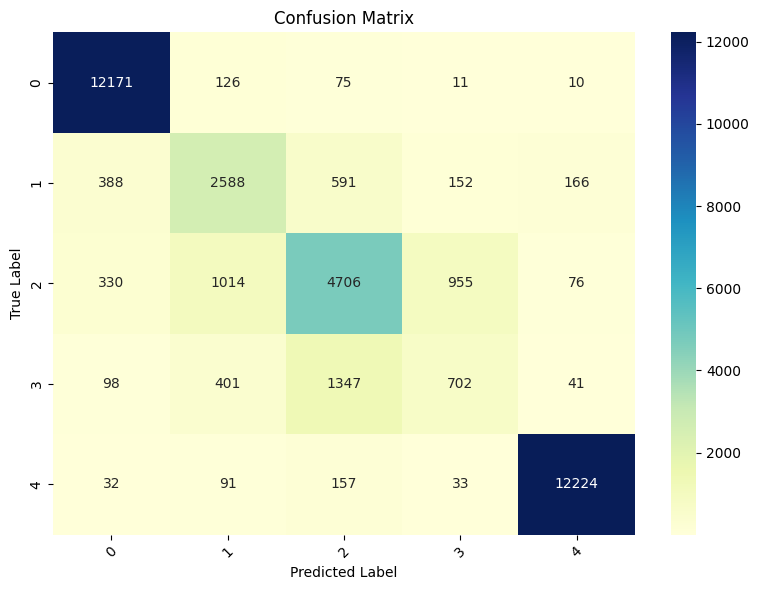

Accuracy: 0.8416525919189295


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the confusion matrix 'cm' from the previous code

# Create a heatmap with annotations and color gradient
plt.figure(figsize=(8, 6))  # Adjust the figure size for a bigger plot
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")  # Use YlGnBu colormap for readability

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Rotate x-axis labels for better readability with many classes
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

### Model-Decision Tree

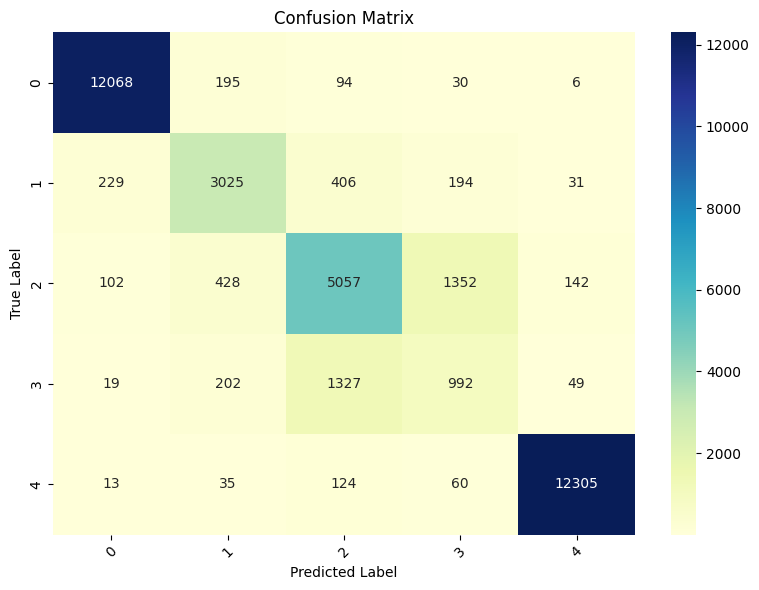

Accuracy: 0.8690918539690788


In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the confusion matrix 'cm' from the previous code

# Create a heatmap with annotations and color gradient
plt.figure(figsize=(8, 6))  # Adjust the figure size for a bigger plot
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")  # Use YlGnBu colormap for readability

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Rotate x-axis labels for better readability with many classes
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

### Model-SVM

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_model = SVC(kernel='poly')  # You can specify different kernels like 'linear', 'poly', 'rbf', etc.

# Train SVM Classifier
svm_model.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = svm_model.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))